# 4-Room Spatial Navigation Task Analyses

This notebook contains the analyses necessary to generate the results for the 4-Room Spatial Navigation Task. The task outputs a plain-text format log file which first needs to be converted to the appropriate intermediate representations (the iPosition format for test results and an intermediate navigation format for study/test navigation results).

<div class="alert alert-block alert-info">Note: Many of these processing steps can take quite a long time to run as they're processing several gigabytes of data. This issue is compounded if the data is being held on a server. If the intermediate data files have already been generated, it is advisable to skip the steps which regenerate them. These slow code blocks are marked with a note box.</div>

## Data Directories

In order to run most cells in this notebook, these data directories need to be defined (and filled with the appropriate data - see the [Data Conversion](#Data-Conversion) section below to generate the data_output_directory contents).

In [1]:
import os

data_directory = r'S:\Work\Virtual Navigation Data'
data_output_directory = r'C:\Users\Kevin\Documents\GitHub\msl-iposition-pipeline\examples\saved_data\4-room-iposition'
intermediate_files_directory = r'C:\Users\Kevin\Documents\GitHub\msl-iposition-pipeline\examples\saved_data\4-room-intermediate-files'

generate_intermediate_files = False  # If True, the cells which generate intermediate files will run (they are very slow)
generate_embedded_animations = False  # If True, the embedded animations will be generated such that they are saved in the file

### Intermediate Files

In [2]:
import os

def join_intermediate_path(filename):
    return os.path.join(intermediate_files_directory, filename)

if not os.path.exists(intermediate_files_directory):
    os.makedirs(intermediate_files_directory)

segmentation_filename = join_intermediate_path(              '4-room_segmentation_analysis.csv'      )
test_cogrecon_filename = join_intermediate_path(             'Holodeck 4-Room Spatial Navigation.csv')
misassignment_intermediate_filename = join_intermediate_path('4-room_misassignments_by_context.csv'  )
cbe_intermediate_filename = join_intermediate_path(          '4-room_cbe.csv'                        )
nav_intermediate_filename = join_intermediate_path(          '4room_navigation_summary.csv'          )
nav_context_intermediate_filename = join_intermediate_path(  '4room_navigation_contexts_summary.csv' )
full_dataset_filename = join_intermediate_path(              '4room_full_dataset.csv'                )
output_directory = '2018-04-25_16-55-14' # This is not needed if intermediate files are being regenerated

## Data Conversion

First we'll process the data into the appropriate formats.

<div class="alert alert-block alert-info">Note: The next cell can take a significant amount of time to run and should only be run on an **empty** directory (otherwise it will append to the files in the directory).

<br><br>To run the cell, set generate_intermediate_files to True (in [Data Directories](#Data-Directories)).
</div>

In [3]:
import cogrecon.core.data_flexing.spatial_navigation.spatial_navigation_analytics as analytics
import os

if 'generate_intermediate_files' in vars() and generate_intermediate_files:
    tmp = [name for name in os.listdir('.') if os.path.isdir(name)]
    analytics.generate_intermediate_files(data_directory, full_study_path=True, full_study_look=False, full_test_path=False,
                                full_test_look=False, full_practice_path=False, full_practice_look=False,
                                full_test_2d=False, full_test_vr=True)
    output_directory = list(set([name for name in os.listdir('.') if os.path.isdir(name)]) - set(tmp))[0]

<div class="alert alert-block alert-info">Note: The next cell can take a significant amount of time to run. If the intermediate data file (*time_travel_task_test_summary.csv* by default) already exists, consider skipping the next cell.<br><br>To run the cell, set generate_intermediate_files to True (in [Data Directories](#Data-Directories)).</div>

In [4]:
from cogrecon.core.batch_pipeline import batch_pipeline
import cogrecon.core.data_flexing.spatial_navigation.spatial_navigation_analytics as analytics
import os

if 'generate_intermediate_files' in vars() and generate_intermediate_files:
    intermediate_files_dir = os.path.join('.', output_directory)
    analytics.generate_segmentation_analysis(os.path.join(output_directory, 'vr_test.csv'), segmentation_filename)
    analytics.convert_to_iposition(os.path.join(output_directory, 'vr_test.csv'), data_output_directory)
    os.remove(os.path.join(data_output_directory, 'categories.txt.bak'))
    os.rename(os.path.join(data_output_directory, 'categories.txt'), os.path.join(data_output_directory, 'categories.txt.bak')) # To avoid confusion over which categories to use

## Test Data Analyses

This subsection contains the analyses which generate basic statistics of interest for the following values:

 * Misplacement
 * Misassignments
 * Context-Boundary Effects (in Space)

<div class="alert alert-block alert-info">Note that this section requires the intermediate files (generated above) to execute.</div>

In [5]:
from cogrecon.core.batch_pipeline import batch_pipeline
import datetime
import logging

batch_pipeline(data_output_directory,
               datetime.datetime.now().strftime(test_cogrecon_filename), collapse_trials=False,
               trial_by_trial_accuracy=False)

2018-04-26 15:03:59 DESKTOP-LKC15NF root[48320] INFO Finding files in folder C:\Users\Kevin\Documents\GitHub\msl-iposition-pipeline\examples\saved_data\4-room-iposition.
2018-04-26 15:04:00 DESKTOP-LKC15NF root[48320] INFO Found 44 data files in 0.0450000762939 seconds.
2018-04-26 15:04:00 DESKTOP-LKC15NF root[48320] INFO Parsing files with expected shape None.
2018-04-26 15:04:01 DESKTOP-LKC15NF root[48320] INFO The following ids were found and are being processed: ['001', '003', '004', '006', '009', '010', '011', '012', '013', '014', '016', '017', '018', '020', '021', '022', '023', '025', '101', '102', '103', '104', '105', '108', '110', '112', '113', '114', '115', '116', '123', '124', '125', '127', '128', '129', '131', '134', '135', '145', '146', '147', '148', '149']
2018-04-26 15:04:02 DESKTOP-LKC15NF root[48320] INFO ['001'] : The transformation function did not reduce the error, removing rotation and retying (old_error=116.577730726, new_error=128.399161709).
2018-04-26 15:04:02 D

2018-04-26 15:04:04 DESKTOP-LKC15NF root[48320] WARNING ['012'] : The transformation function did not reduce the error, removing transform (old_error=150.181860679, new_error=190.358768269).
2018-04-26 15:04:04 DESKTOP-LKC15NF root[48320] INFO ['012'] : The transformation function did not reduce the error, removing rotation and retying (old_error=116.00897283, new_error=140.235256812).
2018-04-26 15:04:04 DESKTOP-LKC15NF root[48320] INFO ['012'] : The transformation function did not reduce the error, removing rotation and retying (old_error=123.620787363, new_error=175.674803127).
2018-04-26 15:04:04 DESKTOP-LKC15NF root[48320] WARNING ['012'] : The transformation function did not reduce the error, removing transform (old_error=123.620787363, new_error=131.731108483).
2018-04-26 15:04:05 DESKTOP-LKC15NF root[48320] INFO ['013'] : The transformation function did not reduce the error, removing rotation and retying (old_error=68.7660394819, new_error=129.296050978).
2018-04-26 15:04:05 DE

2018-04-26 15:04:07 DESKTOP-LKC15NF root[48320] WARNING ['020'] : The transformation function did not reduce the error, removing transform (old_error=89.9426496067, new_error=93.7455742709).
2018-04-26 15:04:07 DESKTOP-LKC15NF root[48320] INFO ['021'] : The transformation function did not reduce the error, removing rotation and retying (old_error=204.772207029, new_error=209.143433788).
2018-04-26 15:04:07 DESKTOP-LKC15NF root[48320] INFO ['021'] : The transformation function did not reduce the error, removing rotation and retying (old_error=127.275923959, new_error=130.386377444).
2018-04-26 15:04:08 DESKTOP-LKC15NF root[48320] INFO ['022'] : The transformation function did not reduce the error, removing rotation and retying (old_error=199.322209239, new_error=264.549021312).
2018-04-26 15:04:08 DESKTOP-LKC15NF root[48320] WARNING ['022'] : The transformation function did not reduce the error, removing transform (old_error=199.322209239, new_error=207.063503215).
2018-04-26 15:04:08 D

2018-04-26 15:04:11 DESKTOP-LKC15NF root[48320] WARNING ['108'] : The transformation function did not reduce the error, removing transform (old_error=310.445138753, new_error=461.542685291).
2018-04-26 15:04:11 DESKTOP-LKC15NF root[48320] INFO ['108'] : The transformation function did not reduce the error, removing rotation and retying (old_error=128.36586763, new_error=152.415908545).
2018-04-26 15:04:11 DESKTOP-LKC15NF root[48320] INFO ['108'] : The transformation function did not reduce the error, removing rotation and retying (old_error=63.6499062195, new_error=91.3072492604).
2018-04-26 15:04:11 DESKTOP-LKC15NF root[48320] INFO ['110'] : The transformation function did not reduce the error, removing rotation and retying (old_error=321.305657174, new_error=366.961647973).
2018-04-26 15:04:11 DESKTOP-LKC15NF root[48320] WARNING ['110'] : The transformation function did not reduce the error, removing transform (old_error=321.305657174, new_error=341.860570416).
2018-04-26 15:04:11 DE

2018-04-26 15:04:14 DESKTOP-LKC15NF root[48320] WARNING ['125'] : The transformation function did not reduce the error, removing transform (old_error=110.83095415, new_error=117.464426419).
2018-04-26 15:04:14 DESKTOP-LKC15NF root[48320] INFO ['125'] : The transformation function did not reduce the error, removing rotation and retying (old_error=144.57356278, new_error=182.568121842).
2018-04-26 15:04:14 DESKTOP-LKC15NF root[48320] WARNING ['125'] : The transformation function did not reduce the error, removing transform (old_error=144.57356278, new_error=150.550593632).
2018-04-26 15:04:14 DESKTOP-LKC15NF root[48320] INFO ['125'] : The transformation function did not reduce the error, removing rotation and retying (old_error=69.1791949631, new_error=99.4875203453).
2018-04-26 15:04:14 DESKTOP-LKC15NF root[48320] WARNING ['125'] : The transformation function did not reduce the error, removing transform (old_error=69.1791949631, new_error=76.3319273093).
2018-04-26 15:04:14 DESKTOP-LKC1

2018-04-26 15:04:17 DESKTOP-LKC15NF root[48320] INFO ['134'] : The transformation function did not reduce the error, removing rotation and retying (old_error=110.195257756, new_error=139.597645401).
2018-04-26 15:04:17 DESKTOP-LKC15NF root[48320] WARNING ['134'] : The transformation function did not reduce the error, removing transform (old_error=110.195257756, new_error=117.81178372).
2018-04-26 15:04:17 DESKTOP-LKC15NF root[48320] INFO ['135'] : The transformation function did not reduce the error, removing rotation and retying (old_error=212.593475584, new_error=214.648696545).
2018-04-26 15:04:17 DESKTOP-LKC15NF root[48320] WARNING ['135'] : The transformation function did not reduce the error, removing transform (old_error=212.593475584, new_error=216.79302254).
2018-04-26 15:04:17 DESKTOP-LKC15NF root[48320] INFO ['135'] : The transformation function did not reduce the error, removing rotation and retying (old_error=76.4756776824, new_error=114.754289661).
2018-04-26 15:04:17 DES

### Visualization Helper Function

These functions will be used to help us streamline later analyses. You need to [install R](https://www.r-project.org/) to use the R features.

In [6]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.robjects import r, pandas2ri
import rpy2.robjects

pandas2ri.activate()
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)
packnames = ['afex']
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))
afex = rpackages.importr('afex')

def rANOVA(_data, column, significance_level=0.05, verbose=False):
    r_data = pandas2ri.py2ri(_data) # Convert the data
    ez = r.aov_ez('subID', column, r_data, within='trial') # Run the anova
    p_value = np.array(np.array(ez)[0])[-1][0] # Store the p-value
    print('_'*50)
    if p_value < significance_level: # Check for significance
        print("Significant (p={0}) change in {1} overall.\r\n".format(p_value, column))
        em = r.emmeans(ez, r.formula('~trial')) # Calculate the trial statistics
        forward_difference_anova_result = r.pairs(em) # Generate the Tukey corrected pairwise comparisons
        forward_difference_anova_summary = r.summary(forward_difference_anova_result) # Summarize the results
        adjacent_p_values = np.array(forward_difference_anova_summary)[5][[True, False, False, True, False, True]]
        for p, l in zip(adjacent_p_values, ['First vs. Second', 'Second vs. Third', 'Third vs. Fourth']):
            if p < significance_level:
                print("Significant (p={0}) change in {1}.".format(p, l))
            else:
                print("No Significant (p={0}) change in {1}.".format(p, l))
        if verbose:
            print(ez) # Print the basic anova result
            print(forward_difference_anova_summary) # Print the pairwise comparisons
    else:
        print("No Significant (p={0}) change in {1} overall.".format(p_value, column))
    print('_'*50)

In [7]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

def visualize_columns(data, column_names, titles, ylabels, fig_size=(15, 5), separate_plots=True, legend_labels=None, subplot_shape=None, verbose_anova=False):
    # Extract the columns of interest
    trial_num = data['trial']
    columns = [data[c_name] for c_name in column_names]
    
    # Generate useful constants
    trials = list(set(trial_num))
    num_items = 10
    num_participants = len(trial_num)
    means = [[np.mean(column[trial_num == i]) for i in trials] for column in columns]
    std_errs = [[np.std(column[trial_num == i])/np.sqrt(num_participants) for i in trials] for column in columns]
    
    # Visualize each trial-over-trial mean in a subplot
    if separate_plots:
        if subplot_shape is None:
            f, axarr = plt.subplots(1, len(column_names))
        else:
            f, axarr = plt.subplots(*subplot_shape)
            axarr = [j for i in axarr for j in i]
        if len(column_names) == 1:
            axarr = [axarr]
        f.set_size_inches(fig_size)
        for ax, title, mean, std_err, ylabel in zip(axarr, titles, means, std_errs, ylabels):
            ax.errorbar(trials, mean, std_err)
            ax.set_title(title)
            ax.grid(True)
            ax.set_xlabel('Trials')
            ax.set_ylabel(ylabel)
            ax.xaxis.set_ticks(trials)
        plt.show()
    else:
        f = plt.figure()
        f.set_size_inches(fig_size)
        for idx, (title, mean, std_err, ylabel) in enumerate(zip(titles, means, std_errs, ylabels)):
            label = ''
            if legend_labels is not None:
                label = legend_labels[idx]
            plt.errorbar(trials, mean, std_err, label=label)
            plt.title(title)
            plt.grid(True)
            plt.xlabel('Trials')
            plt.ylabel(ylabel)
            plt.gca().xaxis.set_ticks(trials)
            plt.legend()
        plt.show()
    
    for column in column_names:
        rANOVA(data, column.replace(' ', '.'), verbose=verbose_anova)
        

### Misplacement and Misassignment in Space

In this section, we'll look at the basic Misplacement and Misassignment metrics.

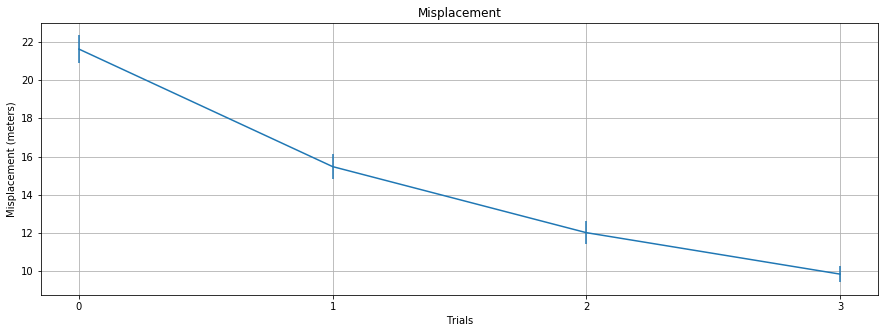

__________________________________________________
Significant (p=4.16237885805e-17) change in Original.Misplacement overall.

Significant (p=5.31689260397e-08) change in First vs. Second.
Significant (p=0.00405846070848) change in Second vs. Third.
No Significant (p=0.137262396593) change in Third vs. Fourth.
__________________________________________________


In [8]:
import pandas as pd

# Load the data
data = pd.read_csv(test_cogrecon_filename, skiprows=[0])

columns =  ['Original Misplacement']
titles = ['Misplacement']
ylabels = ['Misplacement (meters)']
visualize_columns(data, columns, titles, ylabels)

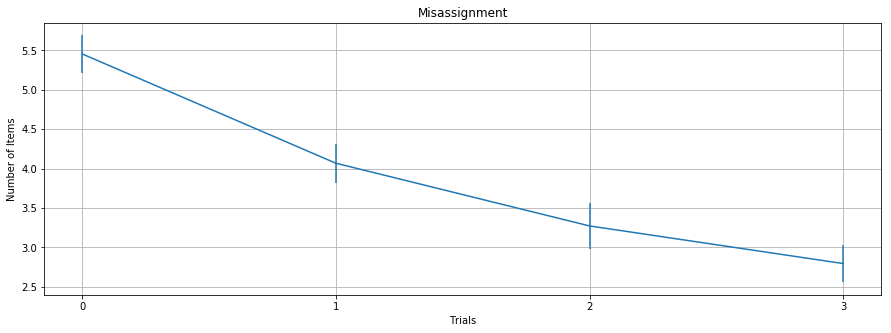

__________________________________________________
Significant (p=3.14044158211e-08) change in Accurate.Misassignment overall.

Significant (p=0.00656836891279) change in First vs. Second.
No Significant (p=0.233565665432) change in Second vs. Third.
No Significant (p=0.665879553244) change in Third vs. Fourth.
Anova Table (Type 3 tests)



Response: Accurate.Misassignment

  Effect           df  MSE         F ges p.value

1  trial 2.81, 121.04 4.11 15.42 *** .08  <.0001

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1



Sphericity correction method: GG 

 contrast  estimate        SE  df t.ratio p.value

 X0 - X1  1.3863636 0.4188695 129   3.310  0.0066

 X0 - X2  2.1818182 0.4188695 129   5.209  <.0001

 X0 - X3  2.6590909 0.4188695 129   6.348  <.0001

 X1 - X2  0.7954545 0.4188695 129   1.899  0.2336

 X1 - X3  1.2727273 0.4188695 129   3.038  0.0151

 X2 - X3  0.4772727 0.4188695 129   1.139  0.6659



P value adjustment: tukey method for comparing a family of

In [9]:
import pandas as pd

# Load the data
data = pd.read_csv(test_cogrecon_filename, skiprows=1)

visualize_columns(data, ['Accurate Misassignment'], ['Misassignment'], ['Number of Items'], verbose_anova=True)

### Context Boundary Effects (in Space)

In this section, we'll read the segmentation file and generate our more traditional measures of context boundary effects. After they are generated, we will visualize it, and, if specified, save it to an intermediate file for later use.

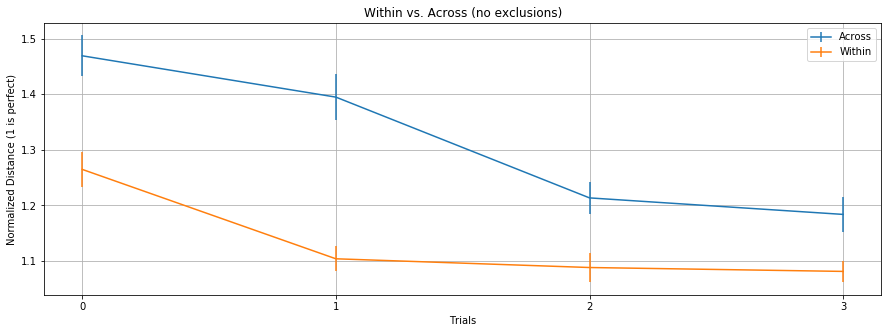

__________________________________________________
Significant (p=0.000674331444256) change in context_crossing_dist_no_exclusions overall.

No Significant (p=0.776525373361) change in First vs. Second.
No Significant (p=0.098047164818) change in Second vs. Third.
No Significant (p=0.981129575628) change in Third vs. Fourth.
__________________________________________________
__________________________________________________
Significant (p=0.0204552423229) change in context_noncrossing_dist_no_exclusions overall.

No Significant (p=0.0607509653576) change in First vs. Second.
No Significant (p=0.99471842726) change in Second vs. Third.
No Significant (p=0.999523622752) change in Third vs. Fourth.
__________________________________________________


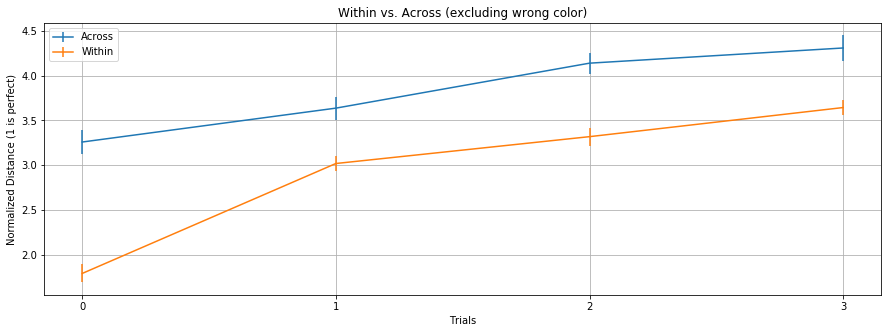

__________________________________________________
Significant (p=0.0159550011142) change in context_crossing_dist_exclude_wrong_color_pairs overall.

No Significant (p=0.706751321029) change in First vs. Second.
No Significant (p=0.486956591932) change in Second vs. Third.
No Significant (p=0.963238697263) change in Third vs. Fourth.
__________________________________________________
__________________________________________________
Significant (p=4.25753730826e-14) change in context_noncrossing_dist_exclude_wrong_color_pairs overall.

Significant (p=8.45970693497e-09) change in First vs. Second.
No Significant (p=0.385659473161) change in Second vs. Third.
No Significant (p=0.313553037714) change in Third vs. Fourth.
__________________________________________________


In [10]:
import pandas as pd

# Load the data
data = pd.read_csv(segmentation_filename)

# Rename to get the naming standards to be correct for the processing
old_column_names = list(data.columns)
old_column_names[0] = 'subID'
old_column_names[1] = 'trial'
data.columns = old_column_names

# Extract the mean normed distances and build a simple summary table
data_summary = pd.DataFrame()
grouped_data = data.groupby(['subID', 'trial', 'context_crossing_class'])
tmp_dist = np.array(grouped_data['normed_distance'].mean())
tmp_sub = np.array(grouped_data['subID'].mean())
tmp_trial = np.array(grouped_data['trial'].mean())
data_summary['subID'] = tmp_sub[0::2]
data_summary['trial'] = tmp_trial[0::2]
data_summary['context_crossing_dist_no_exclusions'] = tmp_dist[0::2]
data_summary['context_noncrossing_dist_no_exclusions'] = tmp_dist[1::2]

tmp = []
for index, row in data.iterrows():
    if not row['first_item_expected_color_room'] == row['first_item_actual_color_room'] or not row['second_item_expected_color_room'] == row['second_item_actual_color_room']:
        tmp.append(np.nan)
    else:
        tmp.append(row['normed_distance'])
data['normed_distance'] = tmp

grouped_data = data.groupby(['subID', 'trial', 'context_crossing_class'])
tmp_dist = np.array(grouped_data['normed_distance'].sum())
tmp_sub = np.array(grouped_data['subID'].mean())
tmp_trial = np.array(grouped_data['trial'].mean())
data_summary['context_crossing_dist_exclude_wrong_color_pairs'] = tmp_dist[0::2]
data_summary['context_noncrossing_dist_exclude_wrong_color_pairs'] = tmp_dist[1::2]
        
# Visualize
columns = ['context_crossing_dist_no_exclusions', 'context_noncrossing_dist_no_exclusions']
titles = ['', 'Within vs. Across (no exclusions)']
legend_labels = ['Across', 'Within']
ylabels = ['Normalized Distance (1 is perfect)', 'Normalized Distance (1 is perfect)']

visualize_columns(data_summary, columns, titles, ylabels, separate_plots=False, legend_labels=legend_labels)

columns = ['context_crossing_dist_exclude_wrong_color_pairs', 'context_noncrossing_dist_exclude_wrong_color_pairs']
titles = ['', 'Within vs. Across (excluding wrong color)']
legend_labels = ['Across', 'Within']
ylabels = ['Normalized Distance (1 is perfect)', 'Normalized Distance (1 is perfect)']

visualize_columns(data_summary, columns, titles, ylabels, separate_plots=False, legend_labels=legend_labels)

if 'generate_intermediate_files' in vars() and generate_intermediate_files:
    data_summary.to_csv(cbe_intermediate_filename)

## Effect of Context on Misassignment

The analysis of the effect of context on misassignment is not included in any of the packages directly. As a result, we need to do some custom computation to get out these numbers.

First, we need to read the data from the **Accurate Misassignment Pairs** column in the temporal only test output file. Because we're running this in one file, we can simply extract this from the output result rather than reading from file.

Then, we'll process the list, counting the number of within vs. across context pairs.

In [11]:
import itertools
import ast
import pandas as pd
import numpy as np
from cogrecon.core.batch_pipeline import get_header_labels

# Load the data
data = pandas.read_csv(test_cogrecon_filename, skiprows=1)
misassignment_pairs = [ast.literal_eval(row) for row in data['Accurate Misassignment Pairs']]

# The pairs which share a context (note that order doesn't matter for this)
# These are tuples, but in this analysis, we don't use tuples because then chance level is more complicated (plus they aren't related to the question at hand)
# within_key = [[1, 2], [2, 1], [5, 6], [6, 5], [13, 15], [15, 13], [11, 7], [7, 11]]
# across_key = [[7, 8], [8, 7], [15, 14], [14, 15], [6, 0], [0, 6], [2, 4], [4, 2]]

context_item_indicies = [[4, 7, 11, 12], [8, 9, 13, 15], [0, 1, 2, 10], [3, 5, 6, 14]]
within_key = []
for context in context_item_indicies:
    keys = list(itertools.product(context, context))
    for key in keys:
        if key[0] != key[1]:
            within_key.append(list(key))

all_keys = []
for key in list(itertools.product(list(range(0, 16)), list(range(0, 16)))):
    if key[0] != key[1]:
        all_keys.append(list(key))

across_key = [ast.literal_eval(el) for el in list(set([str(x) for x in all_keys]) - set([str(x) for x in within_key]))]

# The items to exclude because they had no contextual information
# thus if they were given temporal information, they would not be a valid misassignment
exclusion_items = []

within_list = []
across_list = []
totals_list = []
for i, a in enumerate(misassignment_pairs):
    totals_list.append(len(a))
    within_list.append(0)
    across_list.append(0)
    for el in a:
        if all([el_i not in exclusion_items for el_i in el]):
            if el in within_key:
                within_list[-1] += 1
            elif el in across_key:
                across_list[-1] += 1
within_list_proportion = [float(x)/float(y) if y is not 0 else np.nan for x, y in zip(within_list, totals_list)]
across_list_proportion = [float(x)/float(y) if y is not 0 else np.nan for x, y in zip(across_list, totals_list)]

Now, we can visualize the information we'd like.

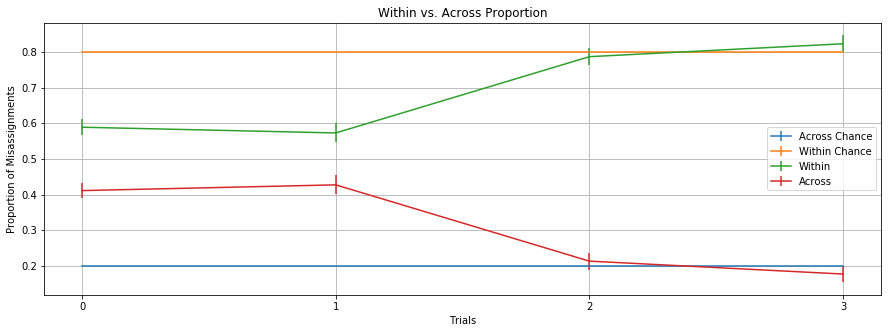

__________________________________________________
No Significant (p=nan) change in top overall.
__________________________________________________
__________________________________________________
No Significant (p=nan) change in bottom overall.
__________________________________________________
__________________________________________________
Significant (p=0.00017775078458) change in within_list_proportion overall.

No Significant (p=0.166396760125) change in First vs. Second.
No Significant (p=0.189600821246) change in Second vs. Third.
No Significant (p=0.993437169852) change in Third vs. Fourth.
Anova Table (Type 3 tests)



Response: within_list_proportion

  Effect          df  MSE        F ges p.value

1  trial 2.74, 54.89 0.05 8.34 *** .15   .0002

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1



Sphericity correction method: GG 

 contrast    estimate         SE df t.ratio p.value

 X0 - X1  -0.14147427 0.06752171 60  -2.095  0.1664

 X0 - X2  -0.278

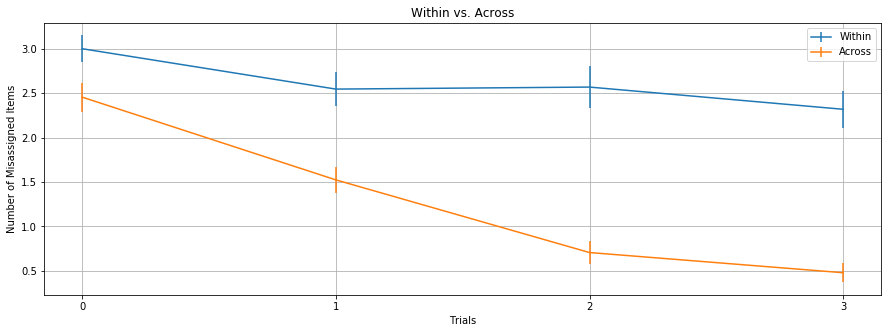

__________________________________________________
No Significant (p=0.45260164812) change in within overall.
__________________________________________________
__________________________________________________
Significant (p=4.43874827967e-09) change in across overall.

Significant (p=0.00635637008876) change in First vs. Second.
Significant (p=0.0215495616098) change in Second vs. Third.
No Significant (p=0.849748488753) change in Third vs. Fourth.
Anova Table (Type 3 tests)



Response: across

  Effect           df  MSE         F ges p.value

1  trial 2.38, 102.13 2.19 20.43 *** .15  <.0001

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1



Sphericity correction method: GG 

 contrast  estimate        SE  df t.ratio p.value

 X0 - X1  0.9318182 0.2806611 129   3.320  0.0064

 X0 - X2  1.7500000 0.2806611 129   6.235  <.0001

 X0 - X3  1.9772727 0.2806611 129   7.045  <.0001

 X1 - X2  0.8181818 0.2806611 129   2.915  0.0215

 X1 - X3  1.0454545 0.2806611 129  

In [12]:
import pandas as pd

data = pd.read_csv(test_cogrecon_filename, skiprows=1)

num_elements = len(within_list_proportion)

chance = float(len(within_key)) / float(len(within_key) + len(across_key))

data['within_list_proportion'] = pandas.Series(within_list_proportion)
data['across_list_proportion'] = pandas.Series(across_list_proportion)
data['within'] = pandas.Series(within_list)
data['across'] = pandas.Series(across_list)
data['top'] = pandas.Series([chance]*num_elements)
data['bottom'] = pandas.Series([(1.-chance)]*num_elements)

columns_proportion = ['top', 'bottom', 'within_list_proportion', 'across_list_proportion']
titles_proportion = ['', '', '', 'Within vs. Across Proportion']
legend_labels_proportion = ["Across Chance", "Within Chance", "Within", "Across"]
ylabels_proportion = ['', '', '', 'Proportion of Misassignments']

columns = ['within', 'across']
titles = ['', 'Within vs. Across']
legend_labels = ["Within", "Across"]
ylabels = ['', 'Number of Misassigned Items']

visualize_columns(data, columns_proportion, titles_proportion, ylabels_proportion, separate_plots=False, legend_labels=legend_labels_proportion, verbose_anova=True)
visualize_columns(data, columns, titles, ylabels, separate_plots=False, legend_labels=legend_labels, verbose_anova=True)

Next we can save these results to an intermediate file for running statistics.

In [13]:
if 'generate_intermediate_files' in vars() and generate_intermediate_files:
    with open(misassignment_intermediate_filename, 'w') as fp:
        fp.write('subID,trial,total_misassignments,within_misassignments,across_misassignments,within_misassignment_proportions,across_misassignment_proportions\n')
        for sid, tr, t, w, a, wp, ap in zip(data['subID'], data['trial'], totals_list,within_list ,across_list,within_list_proportion,across_list_proportion):
            fp.write('{0},{1},{2},{3},{4},{5},{6}\n'.format(sid, tr, t, w, a, wp, ap))

## Navigation Intermediate Data


Next, we can create the summary file for navigation metrics. The [Data Conversion](#Data-Conversion) section created an intermediate file called study_path.csv stored in ./{output_directory} that we will generate the appropriate data from. Note that this functionality is not included in the cogrecon package directly for the 4-room data format, but we can copy much of what is done in [cogrecon.core.data_flexing.time_travel_task.time_travel_task_analytics.summarize_navigation_data](https://github.com/kevroy314/msl-iposition-pipeline/blob/master/cogrecon/core/data_flexing/time_travel_task/time_travel_task_analytics.py#L93).

In [14]:
data = pd.read_csv(os.path.join('.', output_directory, 'study_path.csv'))

In [15]:
grp = data.groupby(['subject_id', 'trial_number'])

(103, 0) is weird.


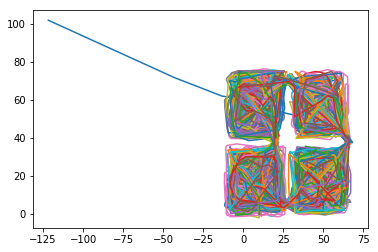

In [16]:
import matplotlib.pyplot as plt
for name, group in grp:
    x, y = np.transpose(np.array(group[['x', 'z']]))
    if any([xx < -25 for xx in x]):
        print('{0} is weird.'.format(name))
    plt.plot(x, y)
plt.show()

In [17]:
import tqdm
import pandas as pd
import numpy as np
import scipy.spatial.distance as distance
from cogrecon.core.data_flexing.time_travel_task.time_travel_task_analytics import calculate_fd_and_lacunarity

def summarize_navigation_data_4room(intermediate_filename,
                                    output_path, 
                                    output_path_contexts,
                                    verbose=True,
                                    fd_indicies_time=None,
                                    fd_indicies_space=None,
                                    fd_indicies_spacetime=None):
    fp = open(output_path, 'wb')
    fp_contexts = open(output_path_contexts, 'wb')
    
    header = (
        'subID,trial,context_order,total_time,total_distance,fd_space,lacunarity_space'
    )

    header_contexts = (
        'subID,trial,context,total_time,total_distance,fd_space,lacunarity_space'
    )
    
    fp.write(header + '\r\n')
    fp_contexts.write(header_contexts + '\r\n')

    data = pd.read_csv(intermediate_filename)
    
    grp = data.groupby(['subject_id', 'trial_number'])
    grp_contexts = data.groupby(['subject_id', 'trial_number', 'room_by_color'])
    
    t = tqdm.tqdm(grp_contexts)
    for name, group in t:
        subID = name[0]
        trial = name[1]
        context = name[2]

        timeline = group['time']
        total_time = max(timeline) - min(timeline)
        
        spaceline = np.transpose(np.array([list(group['x']), list(group['z'])]))
        space_travelled = sum([distance.euclidean(spaceline[idx-1], spaceline[idx]) for idx in range(1, len(spaceline))])
        fd_s, lac_s = calculate_fd_and_lacunarity(spaceline, indicies=fd_indicies_space)

        line = ','.join([str(subID), str(trial), str(context), str(total_time), str(space_travelled), str(fd_s), str(lac_s)])

        if verbose:
            t.set_description(line)

        fp_contexts.write(line + '\r\n')
        fp_contexts.flush()
        
    t = tqdm.tqdm(grp)
    for name, group in t:
        subID = name[0]
        trial = name[1]

        context_order = np.array(group['room_by_color'].unique())
        
        timeline = group['time']
        total_time = max(timeline) - min(timeline)
        
        spaceline = np.transpose(np.array([list(group['x']), list(group['z'])]))
        space_travelled = sum([distance.euclidean(spaceline[idx-1], spaceline[idx]) for idx in range(1, len(spaceline))])
        fd_s, lac_s = calculate_fd_and_lacunarity(spaceline, indicies=fd_indicies_space)

        line = ','.join([str(subID), str(trial), str('-'.join(context_order)), str(total_time), str(space_travelled), str(fd_s), str(lac_s)])

        if verbose:
            t.set_description(line)

        fp.write(line + '\r\n')
        fp.flush()

    fp_contexts.close()
    fp.close()

    return True

<div class="alert alert-block alert-info">Note: The next cell can take a significant amount of time to run. If the intermediate data file (*time_travel_task_navigation_summary.csv* by default) already exists, consider skipping the next cell.<br><br>To run the cell, set generate_intermediate_files to True (in [Data Directories](#Data-Directories)).</div>

See the FD_Lacunarity.ipynb for details on how fd_indicies were determined. They can be calculated for individuals by setting fd_indicies_domain=None. Otherwise a list of scale indicies is expected (in this case, deteremined by the average window across participants).

In [18]:
import os

if 'generate_intermediate_files' in vars() and generate_intermediate_files:
    summarize_navigation_data_4room(os.path.join('.', output_directory, 'study_path.csv'),
                                    nav_intermediate_filename, nav_context_intermediate_filename, verbose=True,
                              fd_indicies_space=[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

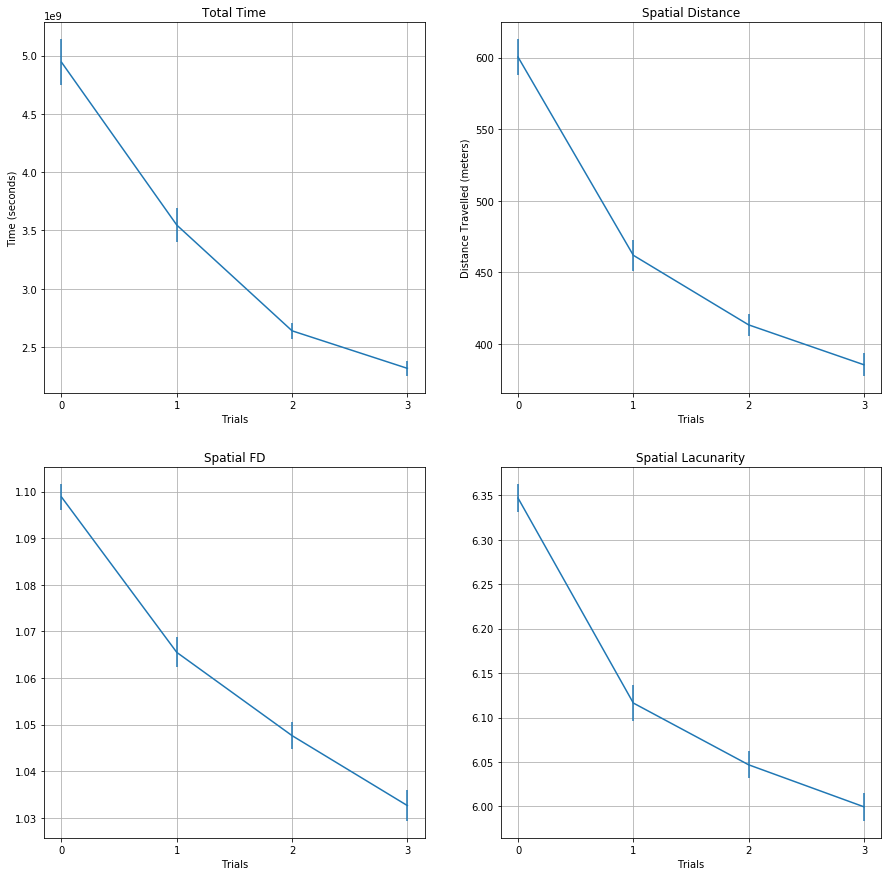

__________________________________________________
Significant (p=3.24930136326e-07) change in total_time overall.

No Significant (p=0.357777754107) change in First vs. Second.
No Significant (p=0.224861599835) change in Second vs. Third.
Significant (p=0.022232790999) change in Third vs. Fourth.
Anova Table (Type 3 tests)



Response: total_time

  Effect           df                   MSE         F ges p.value

1  trial 2.35, 100.90 461307377270371328.00 15.44 *** .17  <.0001

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1



Sphericity correction method: GG 

 contrast   estimate        SE  df t.ratio p.value

 X0 - X1  -210547156 128064280 129  -1.644  0.3578

 X0 - X2  -456409001 128064280 129  -3.564  0.0029

 X0 - X3  -828330648 128064280 129  -6.468  <.0001

 X1 - X2  -245861846 128064280 129  -1.920  0.2249

 X1 - X3  -617783492 128064280 129  -4.824  <.0001

 X2 - X3  -371921647 128064280 129  -2.904  0.0222



P value adjustment: tukey method for compar

In [19]:
import pandas

# Load the data
data_nav = pandas.read_csv(nav_intermediate_filename)

columns = ['total_time', 'total_distance', 'fd_space', 'lacunarity_space']
titles = ['Total Time', 'Spatial Distance', 'Spatial FD', 'Spatial Lacunarity']
ylabels = ['Time (seconds)', 'Distance Travelled (meters)', '', '']

visualize_columns(data_nav, columns, titles, ylabels, separate_plots=True, subplot_shape=[2, 2], fig_size=(15, 15), verbose_anova=True)

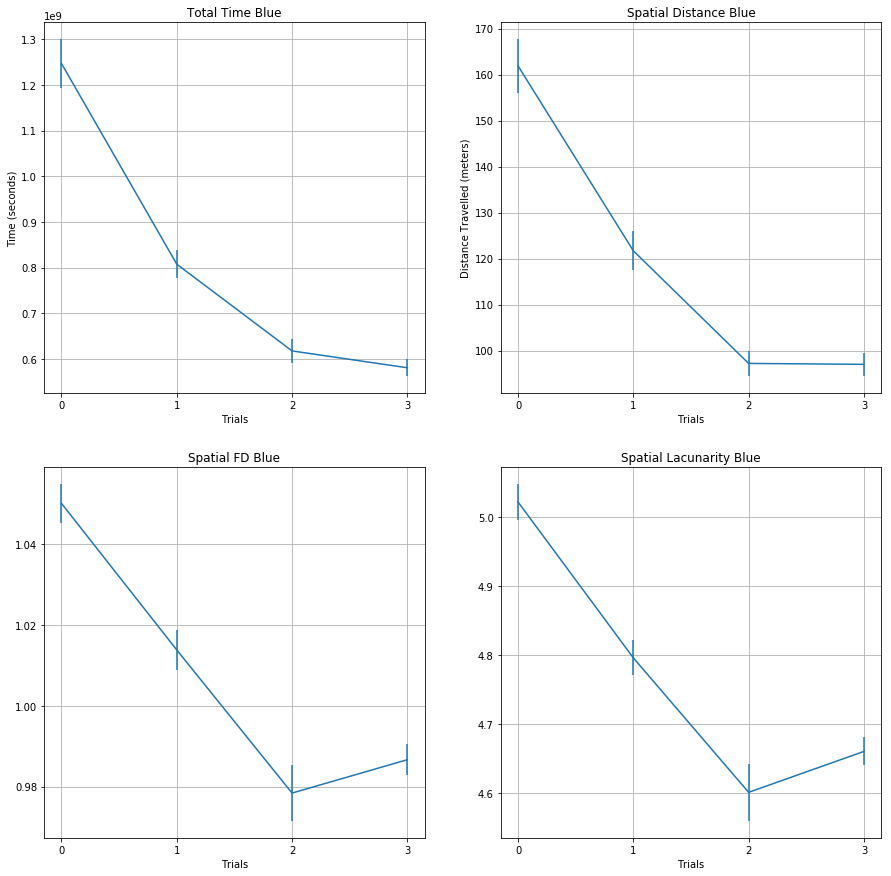

__________________________________________________
Significant (p=3.39598497944e-05) change in total_time overall.

Significant (p=0.0424551256409) change in First vs. Second.
No Significant (p=0.0802959330047) change in Second vs. Third.
No Significant (p=0.998037183112) change in Third vs. Fourth.
Anova Table (Type 3 tests)



Response: total_time

  Effect          df                   MSE         F ges p.value

1  trial 2.08, 87.41 181550026771830496.00 11.29 *** .17  <.0001

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1



Sphericity correction method: GG 

 contrast  estimate       SE  df t.ratio p.value

 X0 - X1  204143591 76539384 126   2.667  0.0425

 X0 - X2  388629542 76539384 126   5.078  <.0001

 X0 - X3  375120801 76539384 126   4.901  <.0001

 X1 - X2  184485951 76539384 126   2.410  0.0803

 X1 - X3  170977210 76539384 126   2.234  0.1198

 X2 - X3  -13508741 76539384 126  -0.176  0.9980



P value adjustment: tukey method for comparing a family o

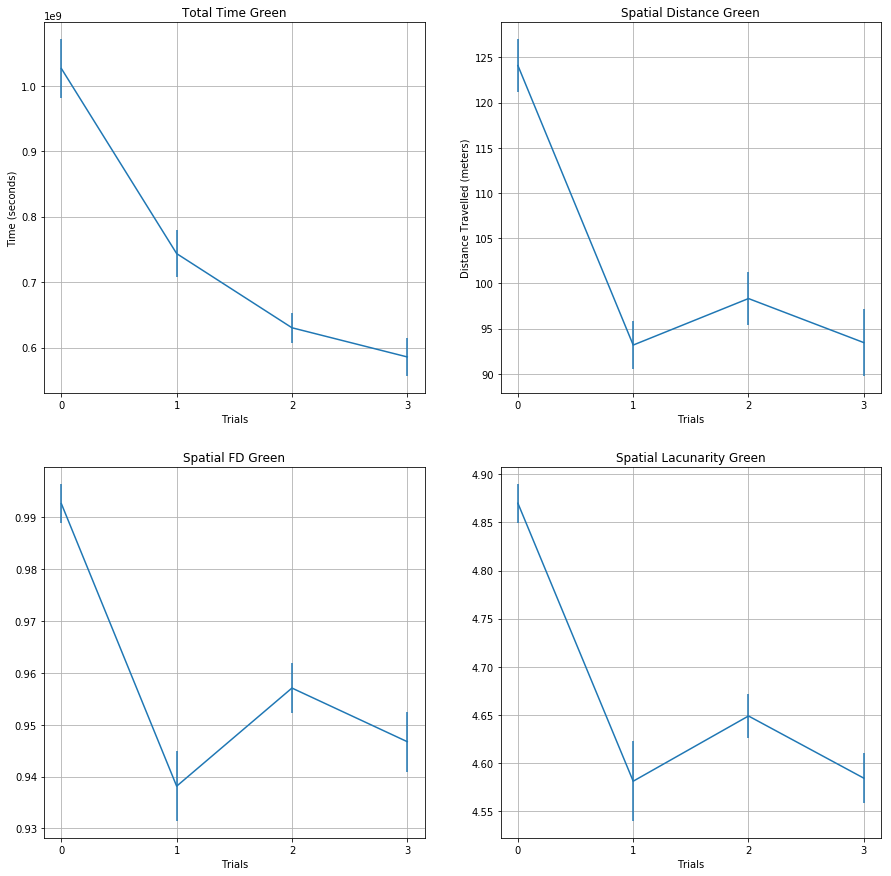

__________________________________________________
Significant (p=0.00151542629395) change in total_time overall.

No Significant (p=0.0599806544096) change in First vs. Second.
No Significant (p=0.999791621281) change in Second vs. Third.
No Significant (p=0.524488650342) change in Third vs. Fourth.
Anova Table (Type 3 tests)



Response: total_time

  Effect           df                   MSE       F ges p.value

1  trial 2.94, 123.27 104536036030235760.00 5.50 ** .08    .002

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1



Sphericity correction method: GG 

 contrast  estimate       SE  df t.ratio p.value

 X0 - X1  174571573 68969829 126   2.531  0.0600

 X0 - X2  180317636 68969829 126   2.614  0.0486

 X0 - X3  274364312 68969829 126   3.978  0.0007

 X1 - X2    5746063 68969829 126   0.083  0.9998

 X1 - X3   99792739 68969829 126   1.447  0.4727

 X2 - X3   94046676 68969829 126   1.364  0.5245



P value adjustment: tukey method for comparing a family of

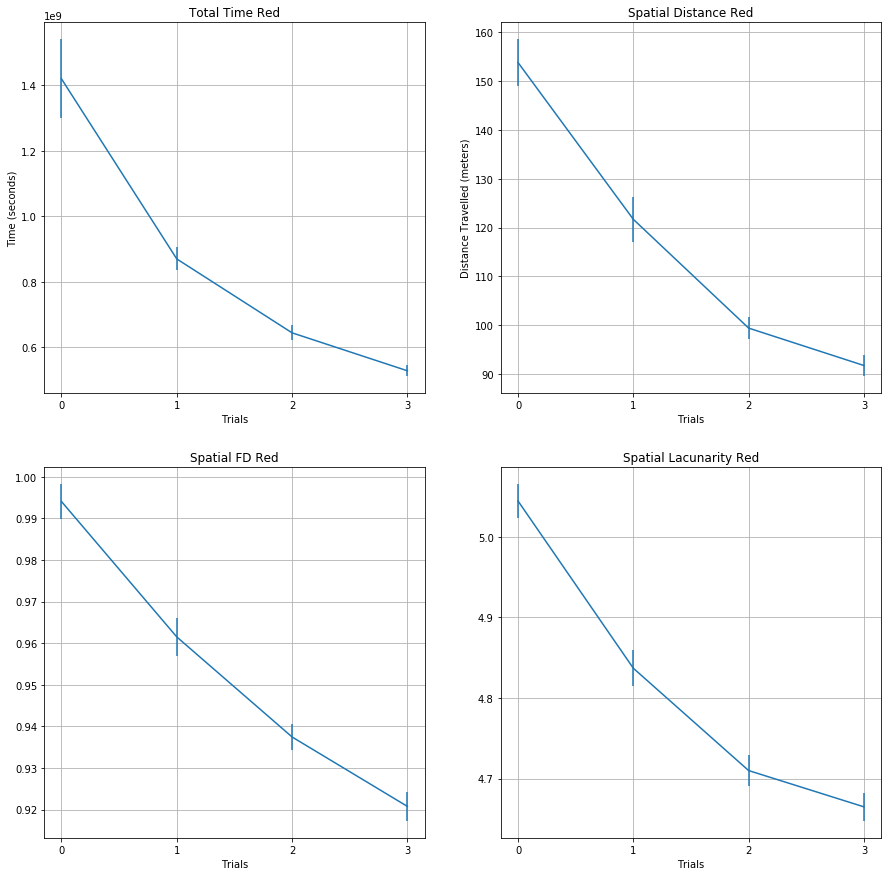

__________________________________________________
Significant (p=0.000196027040874) change in total_time overall.

No Significant (p=0.987158202593) change in First vs. Second.
Significant (p=0.0265633797946) change in Second vs. Third.
No Significant (p=0.477418771043) change in Third vs. Fourth.
Anova Table (Type 3 tests)



Response: total_time

  Effect          df                   MSE        F ges p.value

1  trial 1.86, 78.21 225510699339018592.00 9.99 *** .15   .0002

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1



Sphericity correction method: GG 

 contrast  estimate       SE  df t.ratio p.value

 X0 - X1   26908501 80690629 126   0.333  0.9872

 X0 - X2  256205605 80690629 126   3.175  0.0100

 X0 - X3  372340397 80690629 126   4.614  0.0001

 X1 - X2  229297103 80690629 126   2.842  0.0266

 X1 - X3  345431895 80690629 126   4.281  0.0002

 X2 - X3  116134792 80690629 126   1.439  0.4774



P value adjustment: tukey method for comparing a family of 4

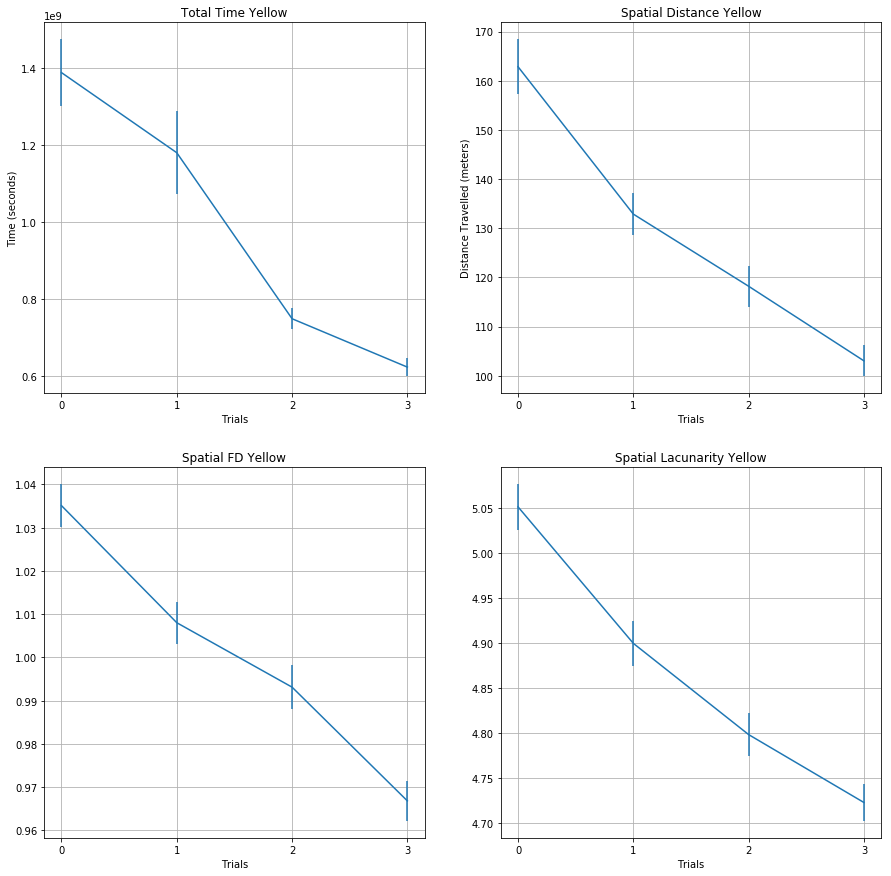

__________________________________________________
Significant (p=0.00445754070255) change in total_time overall.

Significant (p=0.0208625322505) change in First vs. Second.
No Significant (p=0.909496384928) change in Second vs. Third.
No Significant (p=0.457248792484) change in Third vs. Fourth.
Anova Table (Type 3 tests)



Response: total_time

  Effect           df                   MSE       F ges p.value

1  trial 2.43, 104.54 198383761228603808.00 5.14 ** .08    .004

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1



Sphericity correction method: GG 

 contrast  estimate       SE  df t.ratio p.value

 X0 - X1  250181136 85485579 129   2.927  0.0209

 X0 - X2  193204389 85485579 129   2.260  0.1130

 X0 - X3  319054756 85485579 129   3.732  0.0016

 X1 - X2  -56976746 85485579 129  -0.667  0.9095

 X1 - X3   68873620 85485579 129   0.806  0.8517

 X2 - X3  125850367 85485579 129   1.472  0.4572



P value adjustment: tukey method for comparing a family of 4 

In [20]:
import pandas

# Load the data
data_nav_contexts = pandas.read_csv(nav_context_intermediate_filename)

grps = data_nav_contexts.groupby('context')
for name, group in grps:
    columns = ['total_time', 'total_distance', 'fd_space', 'lacunarity_space']
    titles = [x + ' ' + name.title() for x in ['Total Time', 'Spatial Distance', 'Spatial FD', 'Spatial Lacunarity']]
    ylabels = ['Time (seconds)', 'Distance Travelled (meters)', '', '']

    visualize_columns(group, columns, titles, ylabels, separate_plots=True, subplot_shape=[2, 2], fig_size=(15, 15), verbose_anova=True)

## Hierarchical Linear Modeling of Navigation vs. Test Variables

This section shows the statistical analysis of the various Study and Test variables and their associated predictive power.

In [21]:
import pandas as pd

# Load all data
data_summary = pd.read_csv(cbe_intermediate_filename)
data_space = pd.read_csv(test_cogrecon_filename, skiprows=1)
data_nav = pd.read_csv(nav_intermediate_filename)
data_nav_context = pd.read_csv(nav_context_intermediate_filename)
data_missassignment_by_context = pd.read_csv(misassignment_intermediate_filename)

# Sort
[df.sort_values(['subID', 'trial'], inplace=True) for df in [data_summary, data_space, data_nav, data_nav_context, data_missassignment_by_context]]

# Confirm subID and trial match across all data
assert all([a==b==c==d==e for a,b,c,d,e in zip(data_summary['subID'].values, 
                                               data_space['subID'].values, 
                                               data_nav['subID'].values, 
                                               np.transpose([name for name, group in data_nav_context.groupby(['subID', 'trial'])['subID']])[0], # Note: The reason this funny business is needed is because this file is broken down further by context - so we have to group out that column
                                               data_missassignment_by_context['subID'].values)]), 'subIDs do not match in intermediate files'
assert all([a==b==c==d==e for a,b,c,d,e in zip(data_summary['trial'].values, 
                                               data_space['trial'].values, 
                                               data_nav['trial'].values, 
                                               np.transpose([name for name, group in data_nav_context.groupby(['subID', 'trial'])['trial']])[1], # Note: The reason this funny business is needed is because this file is broken down further by context - so we have to group out that column
                                               data_missassignment_by_context['trial'].values)]), 'trials do not match in intermediate files'

data = pd.DataFrame()

# Random Factors
data['subID'] = data_space['subID']
data['trial'] = data_space['trial']

# Study Time Factors (independent variables)

# AS) Simple Path Factors
data['space_travelled'] = data_nav['total_distance']
data['time_travelled'] = data_nav['total_time']

# BS) Complex Path Factors
data['fd_space'] = data_nav['fd_space']
data['lacunarity_space'] = data_nav['lacunarity_space']

# Test Time Factors (dependent variables)

# AT) Simple Factors
data['space_misplacement'] = data_space['Original Misplacement']

# BT) Context Factors
data['across_context_boundary_effect'] = data_summary['context_crossing_dist_exclude_wrong_color_pairs']
data['within_context_boundary_effect'] = data_summary['context_noncrossing_dist_exclude_wrong_color_pairs']
data['context_boundary_effect'] = data_summary['context_crossing_dist_exclude_wrong_color_pairs'] - data_summary['context_noncrossing_dist_exclude_wrong_color_pairs']

# CT) Relational Memory Factors
data['accurate_misassignment_space'] = data_space['Accurate Misassignment']

# DT) Relational Memory and Context Factors
data['within_misassignments'] = data_missassignment_by_context['within_misassignments']
data['across_misassignments'] = data_missassignment_by_context['across_misassignments']

if 'generate_intermediate_files' in vars() and generate_intermediate_files:
    data.to_csv(full_dataset_filename)

### Relationships of Interest

 * Do **Simple or Complex Path Factors (AS, BS)** predict **Simple Factors (AT)**, **Relational Memory Factors (CT)**, or **Relational Memory and Context Factors (DT)**,

### Import R Modules for HLM

Because Python just isn't the right environment for this sort of stats, we'll use nlme in R using rpy2 as an interface.

In [22]:
from rpy2.robjects import pandas2ri
import rpy2.robjects as robjects
import numpy as np

pandas2ri.activate()

Just in case nlme is not properly installed, we can try to install it. If prompts appear, you'll need to accept the install in order to use the next code sections.

In [23]:
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.robjects import r

utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

# R package names
packnames = ['nlme', 'stats', 'reghelper', 'MuMIn', 'afex']

names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

Now we can convert the data and import the nlme package.

In [24]:
r_dataframe = pandas2ri.py2ri(data)

nlme = rpackages.importr('nlme')
rstats = rpackages.importr('stats')
reghelper = rpackages.importr('reghelper')
mumin = rpackages.importr('MuMIn')
afex = rpackages.importr('afex')

Next we can run the model and print out the t-Table.

In [25]:
# correlation=nlme.corSymm(form=r.formula('~1 | subID/trial'))
random_effects_model = '~ trial | subID'
navigation = 'time_travelled + space_travelled + fd_space + lacunarity_space'
model_formulas = [
    # Misplacement vs. Navigation Models
    'space_misplacement ~ ' + navigation,
    
    # Misassignment vs. Navigation Models
    'accurate_misassignment_space ~ ' + navigation,
]

transform_functions = [lambda x: x, lambda x: x]
                       # np.sqrt, np.cbrt, np.log, lambda x: 1/x, lambda x: x
data_transformed = data.copy(True)
for c, tf in zip(['space_misplacement', 
              'accurate_misassignment_space',
              'within_misassignments', 'across_misassignments', 'context_boundary_effect'], transform_functions):
    data_transformed[c] = data_transformed[c].apply(tf)
r_transformed_dataframe = pandas2ri.py2ri(data_transformed)

models = [nlme.lme(r.formula(model_formula),
                   random=r.formula(random_effects_model), 
                   data=r_transformed_dataframe, 
                   control=nlme.lmeControl(maxIter=100, msMaxIter=100, opt='optim'), # Note: 'optim' is needed to avoid failure to converge
                   **{'na.action': 'na.omit'} # Other options can be found here: https://stat.ethz.ch/R-manual/R-devel/library/stats/html/na.fail.html
                  )
          for model_formula in model_formulas]

# Uncomment this to view all the possible keys
# print(r.summary(models[0]).names)

# We can pick certain keys to ignore during printing
ignore_keys = ['modelStruct', 'dims', 'contrasts', 'coefficients', 'varFix',
               'sigma', 'apVar', 'numIter', 'groups', 'logLik', 
               'call', 'terms', 'fitted', 'method', 'residuals', 
               'fixDF', 'na.action', 'data' , 'corFixed', # 'tTable'
               'BIC', 'AIC'
              ]

for model, name in zip(models, model_formulas):
    for key in r.summary(model).names:
        if key not in ignore_keys:
            print("_"*len(name))
            print(name)
            print("_"*len(name))
            print(r.summary(model).rx2(key))
            print(reghelper.beta(model).rx2('tTable'))

___________________________________________________________________________________
space_misplacement ~ time_travelled + space_travelled + fd_space + lacunarity_space
___________________________________________________________________________________
                         Value    Std.Error  DF    t-value      p-value

(Intercept)      -1.565284e+02 4.550451e+01 128 -3.4398438 0.0007862773

time_travelled   -6.019638e-10 7.207787e-10 128 -0.8351576 0.4051851342

space_travelled  -3.256128e-02 1.387510e-02 128 -2.3467425 0.0204733937

fd_space          9.864444e+01 2.620222e+01 128  3.7647361 0.0002529549

lacunarity_space  1.289953e+01 6.901561e+00 128  1.8690736 0.0638979077

                         Value  Std.Error  DF    t-value      p-value

(Intercept)        -0.31742022 0.08678691 128 -3.6574666 0.0003707672

time_travelled.z   -0.04875225 0.05837491 128 -0.8351576 0.4051851341

space_travelled.z  -0.54915126 0.23400575 128 -2.3467425 0.0204733937

fd_space.z          0.5067

We can see the overall fit of the various models in this next section.

In [26]:
r_squared_values = np.array([np.array(mumin.r_squaredGLMM_lme(model)) for model in models]).transpose()
values = [model_formulas, r_squared_values[0], r_squared_values[1]]
columns = ["Model Formulas", "Marginal R^2 (Fixed Effects)", "Conditional R^2 (Fixed + Random Effects)"]
r_squared_data_frame = pandas.DataFrame({c: v for c, v in zip(columns, values)})
r_squared_data_frame

,Conditional R^2 (Fixed + Random Effects),Marginal R^2 (Fixed Effects),Model Formulas
0,0.726450,0.145448,space_misplacement ~ time_travelled + space_tr...
1,0.678052,0.158115,accurate_misassignment_space ~ time_travelled ...


We can also plot the random coefficients for subID and trial. First we'll extract the data then plot.

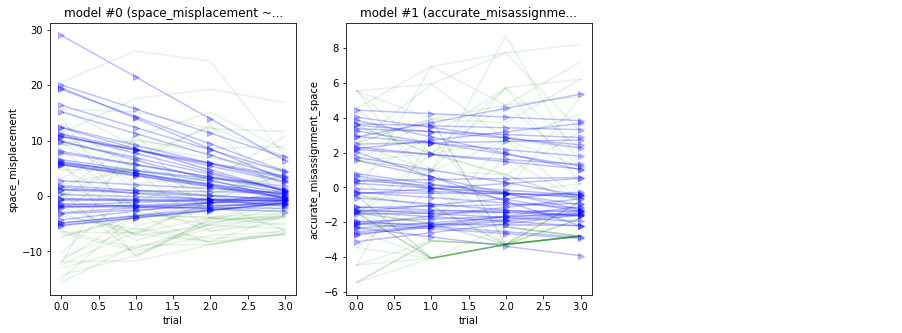

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

num_rows = int(np.ceil(len(models)/3.))
fig, axes = plt.subplots(num_rows, 3)
fig.set_size_inches((15, num_rows*5))
if num_rows > 1:
    axes = [item for sublist in axes for item in sublist]

for idx, (model, ax) in enumerate(zip(models, axes)):
    terms = r.summary(model).rx2('terms').r_repr()
    c = str(terms.split('~')[0].strip())

    title = 'model #{0} ({1})'.format(idx, terms, c)
    ax.set_title(title[:30] + '...')
    ax.set_ylabel(c)
    ax.set_xlabel('trial')
    
    #yd = np.transpose([np.array(pandas.Series(data[c][data['trial'] == n]).fillna(method='backfill')) for n in [0, 1, 2, 3]])
    yd = np.transpose([data_transformed[c][data_transformed['trial'] == n] for n in [0, 1, 2, 3]])
    # Get the subject coefficients
    subject_lines = pandas2ri.ri2py(r.summary(model).rx2('coefficients').rx2('random').rx2('subID'))
    x = np.array([0, 1, 2, 3])
    ys = [x*slope + intercept for intercept, slope in subject_lines]
    
    # Get the mean line from the t table
    # Note: This section is commented out because I didn't properly look for the variable of interest, 
    # so the index may change depending on the model
    #
    # mean_line = pandas2ri.ri2py(r.summary(model).rx2('tTable'))
    # mean = x*mean_line[1][0] + mean_line[1][1]
    # plt.plot(list(x), list(mean), c='r', marker='>')
    
    # Plot all the lines
    for y, label, y2 in zip(ys, list(np.linspace(0.0, 1.0, len(ys))), yd):
        ax.plot(list(x), list(y), c='b', marker='>', alpha=0.25)
        ax.plot(list(x), y2 - np.nanmean(yd, axis=0), c='g', alpha=0.1)

    

# Clean up empty extra subplots
for idx in range(1, 3-len(models)%3 + 1):
    axes[-idx].axis('off')
    
plt.show()

We can visualize the correlations as well.

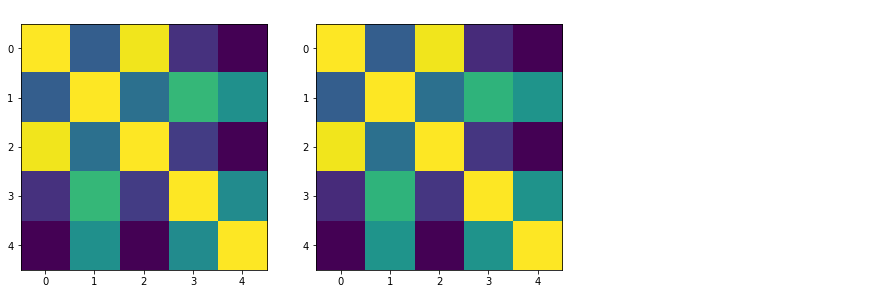

___________________________________________________________________________________
space_misplacement ~ time_travelled + space_travelled + fd_space + lacunarity_space
___________________________________________________________________________________
                 (Intercept) time_travelled space_travelled    fd_space

(Intercept)        1.0000000    -0.29439039       0.9580580 -0.58064506

time_travelled    -0.2943904     1.00000000      -0.1602716  0.38271778

space_travelled    0.9580580    -0.16027160       1.0000000 -0.51268465

fd_space          -0.5806451     0.38271778      -0.5126847  1.00000000

lacunarity_space  -0.8378927     0.08039419      -0.8436997  0.04376613

                 lacunarity_space

(Intercept)           -0.83789268

time_travelled         0.08039419

space_travelled       -0.84369972

fd_space               0.04376613

lacunarity_space       1.00000000

_____________________________________________________________________________________________
accura

In [28]:
import matplotlib.pyplot as plt

num_rows = int(np.ceil(len(models)/3.))
fig, axes = plt.subplots(num_rows, 3)
fig.set_size_inches((15, num_rows*5))
if num_rows > 1:
    axes = [item for sublist in axes for item in sublist]

print_buffer = ''

for model, name, ax in zip(models, model_formulas, axes):
    print_buffer += str("_"*len(name)) +'\r\n'
    print_buffer += str(name)+'\r\n'
    print_buffer += str("_"*len(name))+'\r\n'
    print_buffer += str(r.summary(model).rx2('corFixed'))+'\r\n'
    correlations = pandas2ri.ri2py(r.summary(model).rx2('corFixed'))
    ax.imshow(correlations)

# Clean up empty extra subplots
for idx in range(1, 3-len(models)%3 + 1):
    axes[-idx].axis('off')

plt.show()

print(print_buffer)

And we can compare multiple models of interest. For instance, if we create a larger model that combines all simple and complex navigation variables, we can see if the fit is better than if we use restricted models.

In [29]:
# Note: One interesting example of model comparisons is comparing the spatial and temporal path metrics predictive power
# over spatial or temporal misplacement. i.e.:
#
# model_0 = 'space_misplacement ~ (space_travelled + fd_space + lacunarity_space)'
# model_1 = 'space_misplacement ~ (time_travelled + fd_time + lacunarity_time)'
# and
# model_0 = 'time_misplacement ~ (space_travelled + fd_space + lacunarity_space)'
# model_1 = 'time_misplacement ~ (time_travelled + fd_time + lacunarity_time)'
#
# In both cases, the temporal path metrics resulted in a better fit than the spatial ones, 
# even when the test metric was spatial.

# Define two models to compare
model_0 = 'space_misplacement ~ space_travelled'
model_1 = model_formulas[0]

# Make a list of formulas to pass to the model function
step_mf = [model_0, model_1]

step_models = [nlme.lme(r.formula(model_formula),
                   random=r.formula(random_effects_model), 
                   data=r_transformed_dataframe, 
                   control=nlme.lmeControl(maxIter=100, msMaxIter=100, opt='optim'), # Note: 'optim' is needed to avoid failure to converge
                   **{'na.action': 'na.omit'} # Other options can be found here: https://stat.ethz.ch/R-manual/R-devel/library/stats/html/na.fail.html
                  )
          for model_formula in step_mf]

# Get the model results and run an anova to compare the models
m0, m1 = step_models
result = r.anova(m0, m1)

# Convert the output of the anova into a Pandas DataFrame for convenience
summary_frame = pandas.DataFrame(np.transpose(np.concatenate([[[step_mf[0], step_mf[1]]], np.array(result[2:])])))
for idx, c in enumerate(summary_frame): # Coerce to numeric all but the first column
    if idx != 0: summary_frame[c] = pandas.to_numeric(summary_frame[c], errors='coerce')
    
# Name the columns for convenience
summary_frame.columns = ['Model Formula', 'Df', 'AIC', 'BIC', 'logLik', 'Model', 'Chisq', 'P Value'][0:len(summary_frame.columns)]

print("_"*50 + "\r\nANOVA Summary")
print(summary_frame)

print("_"*50 + "\r\nResult\r\n" + "_"*50)

# If the P Value is significant, check the BIC to determine which model was a better fit (lower BIC is better fit)
best_model_idx = -1
if len(summary_frame.columns) == 5:
    print('The Models are identitcal.')
elif summary_frame['P Value'][1] < 0.05:
    print('The models were significantly different.')
    if summary_frame['BIC'][0] > summary_frame['BIC'][1]:
        print("The second model ({0}) is significantly better than the first.".format(step_mf[1]))
        best_model_idx = 1
    else:
        print("The first model ({0}) is significantly better than the second.".format(step_mf[0]))
        best_model_idx = 0
else:
    print('The models were NOT significantly different.')

print("_"*50 + "\r\nBest Model t Table(s)\r\n" + "_"*50)

if best_model_idx == -1:
    print(r.summary(m0).rx2('tTable'))
    print(r.summary(m1).rx2('tTable'))
    print("_"*50 + "\r\nBest Model Beta Table(s)\r\n" + "_"*50)
    print(reghelper.beta(m0).rx2('tTable'))
    print(reghelper.beta(m1).rx2('tTable'))
    best_model = step_models[0]
else:
    print(r.summary(step_models[best_model_idx]).rx2('tTable'))
    print("_"*50 + "\r\nBest Model Beta Table(s)\r\n" + "_"*50)
    print(reghelper.beta(step_models[best_model_idx]).rx2('tTable'))
    best_model = step_models[best_model_idx]

__________________________________________________
ANOVA Summary
                                       Model Formula   Df          AIC  \
0               space_misplacement ~ space_travelled  6.0  1198.508462   
1  space_misplacement ~ time_travelled + space_tr...  9.0  1208.854123   

           BIC      logLik  Model     Chisq   P Value  
0  1217.462794 -593.254231    1.0       NaN       NaN  
1  1237.129095 -595.427062    2.0  4.345661  0.226477  
__________________________________________________
Result
__________________________________________________
The models were NOT significantly different.
__________________________________________________
Best Model t Table(s)
__________________________________________________
                     Value   Std.Error  DF  t-value      p-value

(Intercept)     3.89654349 1.509100672 131 2.582030 1.092111e-02

space_travelled 0.01566543 0.003325646 131 4.710494 6.214527e-06

                         Value    Std.Error  DF    t-value      p-va

Note that the Beta coefficients can be used to determine the relative imporance of the various predictor variables in the chosen model. The larger the beta coefficient (i.e. the first column in the Beta Tables) the better a predictor the independent variable is of the dependent variable.

Finally, we can test for normality of our residuals to confirm that the model is appropriately capturing the effect.

space_misplacement ~ time_travelled + space_travelled + fd_space + lacunarity_space
k2 = 25.1274679077, p = 3.49654942669e-06
The residuals were NOT normal.
k2 = 5.96586014747, p = 0.0506442249404
The residuals were normal.


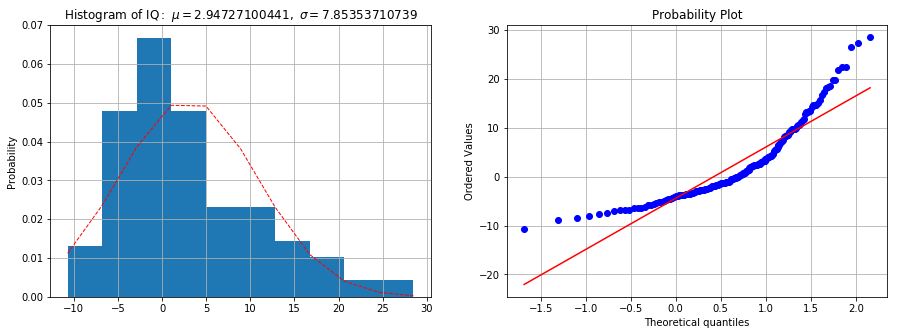

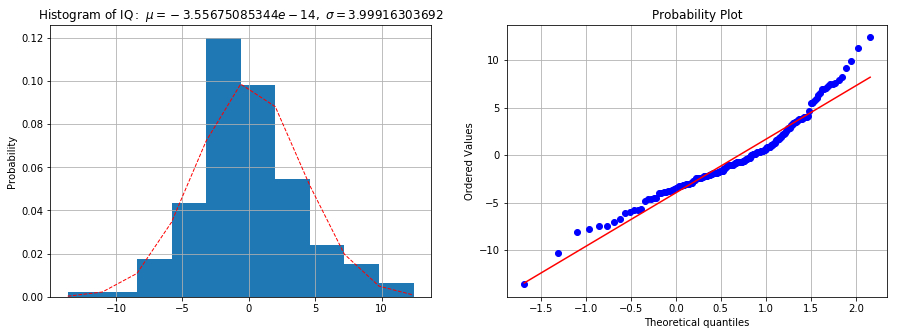

accurate_misassignment_space ~ time_travelled + space_travelled + fd_space + lacunarity_space
k2 = 9.67357555328, p = 0.00793249411303
The residuals were NOT normal.
k2 = 0.883840230905, p = 0.64280098327
The residuals were normal.


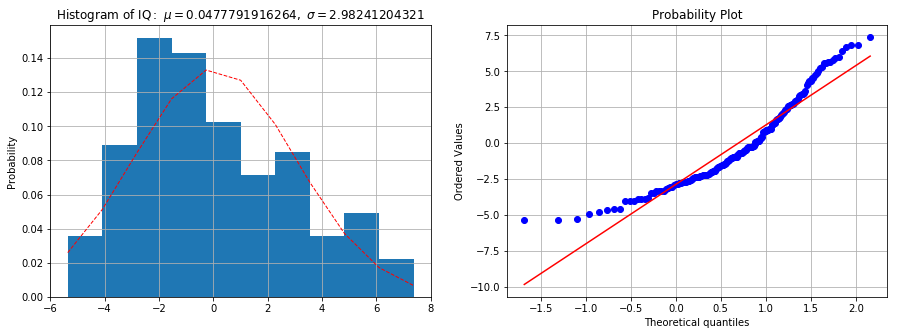

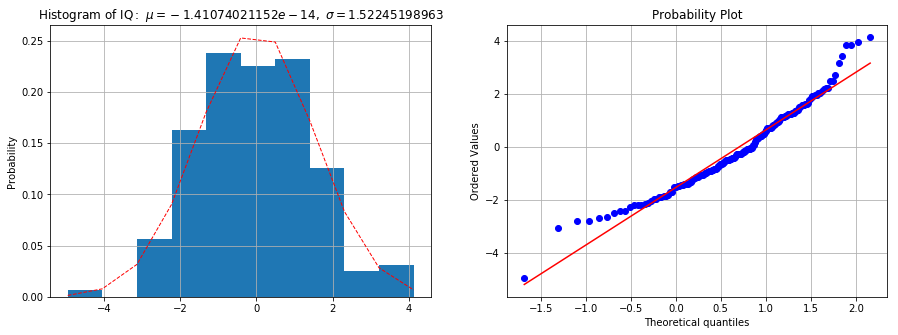

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab

def residual_plot_1d(model, level=0, label=''):
    f, (ax0, ax1) = plt.subplots(1, 2)
    f.set_size_inches(15., 5.)
    
    data = np.array(r.residuals(model, level=level))

    n, bins, patches = ax0.hist(data, normed=1,)
    (mu, sigma) = stats.norm.fit(data)
    y = mlab.normpdf( bins, mu, sigma)
    l = ax0.plot(bins, y, 'r--', linewidth=1)

    res = stats.probplot(data, dist=stats.loggamma, sparams=(2.5,), plot=ax1)
    
    ax0.set_xlabel(label)
    ax0.set_ylabel('Probability')
    ax0.set_title(r'$\mathrm{Histogram\ of\ IQ:}\ ' + '\mu={0},\ \sigma={1}$'.format(mu, sigma))
    ax0.grid(True)
    ax1.grid(True)
    
    return data

mfs = model_formulas # [model_formulas[x] for x in [0, 1, 3, 5, 6]]

norm_models = [nlme.lme(r.formula(model_formula),
                   random=r.formula(random_effects_model), 
                   data=r_transformed_dataframe, 
                   control=nlme.lmeControl(maxIter=100, msMaxIter=100, opt='optim'), # Note: 'optim' is needed to avoid failure to converge
                   **{'na.action': 'na.omit'} # Other options can be found here: https://stat.ethz.ch/R-manual/R-devel/library/stats/html/na.fail.html
                  )
          for model_formula in mfs]

for model, form in zip(norm_models, mfs):
    model_under_test = model
    print(form)
    res0 = residual_plot_1d(model_under_test, level=0)
    res1 = residual_plot_1d(model_under_test, level=1)

    k2, p = stats.normaltest(res0)
    print('k2 = {0}, p = {1}'.format(k2, p))
    if p < 0.05:
        print('The residuals were NOT normal.')
    else:
        print('The residuals were normal.')
    k2, p = stats.normaltest(res1)
    print('k2 = {0}, p = {1}'.format(k2, p))
    if p < 0.05:
        print('The residuals were NOT normal.')
    else:
        print('The residuals were normal.')

    plt.show()

### Animate trial-over-trial relationship between two variables

We can animate the relationship between two variables using the following code. Note that the next code block will quickly generate the plot object, but we visualize it in the following cell (which can take some time to run).

In [31]:
%%capture

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import scipy.stats as stats
import os
import IPython.display as display


import statsmodels.api as smapi
from statsmodels.formula.api import ols
import statsmodels.graphics as smgraphics

rc('animation', html='html5')
%matplotlib inline

relations = [
    ['space_misplacement', 'space_travelled'],
    ['space_misplacement', 'fd_space'],
    ['accurate_misassignment_space', 'space_travelled'],
    ['accurate_misassignment_space', 'fd_space'],
    ['accurate_misassignment_space', 'lacunarity_space']
]

def get_animation_from_data(xs, ys, title='', x_label='', y_label='', animate=True):
    def update_plot(t):
        if t+1 >= len(xs): # For pausing at the end
            t = 2.99
        index = int(np.floor(t))
        nt = t % 1.0
        
        newPoints = np.transpose([xs[index+1], ys[index+1]])
        originalPoints = np.transpose([xs[index], ys[index]])
        interpolation = originalPoints*(1-nt) + newPoints*nt
        
        scat.set_offsets(interpolation)
        
        line_x = np.linspace(np.min(xs), np.max(xs), 10)
        newLine = np.transpose([line_x, np.array([fits[index+1][0]*x + fits[index+1][1] for x in line_x])])
        originalLine = np.transpose([line_x, np.array([fits[index][0]*x + fits[index][1] for x in line_x])])
        interpolation = originalLine*(1-nt) + newLine*nt
        
        line_plot[0].set_xdata(np.transpose(interpolation)[0])
        line_plot[0].set_ydata(np.transpose(interpolation)[1])
        
        r = fits[index][2]*(1-nt) + fits[index+1][2]*nt
        p = fits[index][3]*(1-nt) + fits[index+1][3]*nt
        
        txt.set_text('p=' + "{:.2f}".format(p) + '\n' + 'r=' + "{:.2f}".format(r))
        
        return scat,
    
    if animate:
        fig = plt.figure()
        ax = plt.gca()
    else:
        fig = plt.figure()
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(223)
        ax4 = fig.add_subplot(224)
        axs = [ax1, ax2, ax3, ax4]
        ax = axs[0]
        for ax in axs:
            ax.set_xlabel(x_label)
            ax.set_ylabel(y_label)
    
    masks = [[ ~np.isnan(varx) & ~np.isnan(vary) for varx, vary in zip(x, y)] for x, y in zip(xs, ys)]
    
    for idx, (x, y, mask) in enumerate(zip(xs, ys, masks)):
        regression = ols("data ~ x", data=dict(data=y[mask], x=x[mask])).fit()
        test = regression.outlier_test()
        outliers = []
        try:
            outliers = ((i, x[i],y[i]) for i,t in enumerate(test['bonf(p)']) if t < 0.5)
            print 'Outliers: ', list(outliers)
        except:
            pass
        for outlier in outliers:
            del masks[idx][outerliers[0]]
            del xs[idx][outerliers[0]]
            del xs[idx][outerliers[0]]
        

    
    fits = [stats.linregress(x[mask], y[mask]) for x, y, mask in zip(xs, ys, masks)]
    
    scat = plt.scatter([], [], color='white', edgecolors ='black')
    
    if animate:
        txt = plt.text(1, 0, '', fontsize=12, ha='right', va='bottom', transform=ax.transAxes)
        line_plot = plt.plot([], [], color='black')
        anim = animation.FuncAnimation(fig, update_plot, frames=np.arange(0, 4, 0.01), interval=33)
        plt.title(title)
        [plt.scatter(x, y, label=idx+1, alpha=0.5) for idx, (x, y) in enumerate(zip(xs, ys))]
        plt.legend(loc=2)
        plt.tight_layout()
    else:
        plt.suptitle(title)
        fig.set_size_inches((15, 8))
        for idx, (x, y, ax, fit) in enumerate(zip(xs, ys, axs, fits)):
            ax.set_title('Trial {0}'.format(idx+1))
            txt = plt.text(1, 0, '', fontsize=12, ha='right', va='bottom', transform=ax.transAxes)
            ax.scatter(x, y, label=idx+1, alpha=0.5)
            line_plot = plt.plot([], [], color='black')
            line_x = np.linspace(np.min(x), np.max(x), 10)
            line_y = np.array([fit[0]*x + fit[1] for x in line_x])
            ax.plot(line_x, line_y, 'k')
            r = fit[2]
            p = fit[3]
            txt.set_text('p=' + "{:.2f}".format(p) + '\n' + 'r=' + "{:.2f}".format(r))
            plt.tight_layout()
    
    if animate:
        plt.close()
        return anim

def get_animation(relation, animate=True):
    xs = [data[relation[1]][data['trial'] == n] for n in [0, 1, 2, 3]]
    ys = [data[relation[0]][data['trial'] == n] for n in [0, 1, 2, 3]]

    return get_animation_from_data(xs, ys, title=relation[1].replace('_',' ').title() + ' vs. ' + relation[0].replace('_',' ').title(), x_label=relation[1].replace('_',' ').title(), y_label=relation[0].replace('_',' ').title(), animate=animate)

# Note: you'll need to change the ffmpeg path to use this on your machine
def embed_animation_as_gif(_animation, ffmpeg_path=r'C:\mingw2\bin\ffmpeg.exe'):
    if not os.path.exists(ffmpeg_path):
        return _animation
    _animation.save('animation.mp4')
    os.system("ffmpeg -i animation.mp4 animation.gif -y")
    data='0'
    IMG_TAG = '<img src="data:image/gif;base64,{0}">'
    with open('animation.gif', 'rb') as f:
        data = f.read()
        data = data.encode('base64')
    return HTML(IMG_TAG.format(data))

Outliers:  []
Outliers:  Outliers:  Outliers:  Outliers:  []
Outliers:  Outliers:  Outliers:  Outliers:  []
Outliers:  []
Outliers:  Outliers:  Outliers:  []
Outliers:  []
Outliers:  []
Outliers:  Outliers:  []
Outliers:  Outliers:  []
Outliers: 


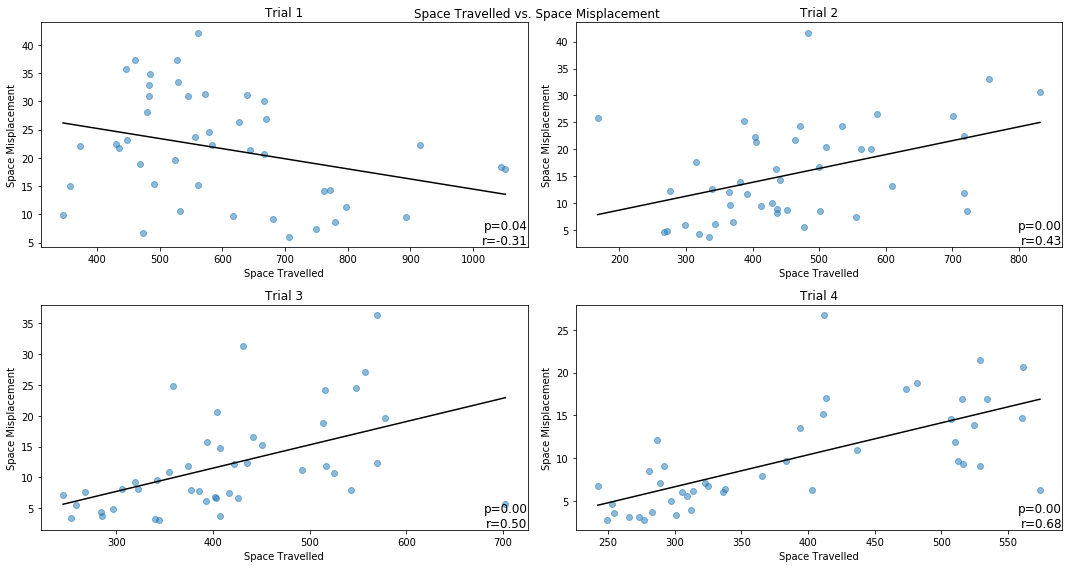

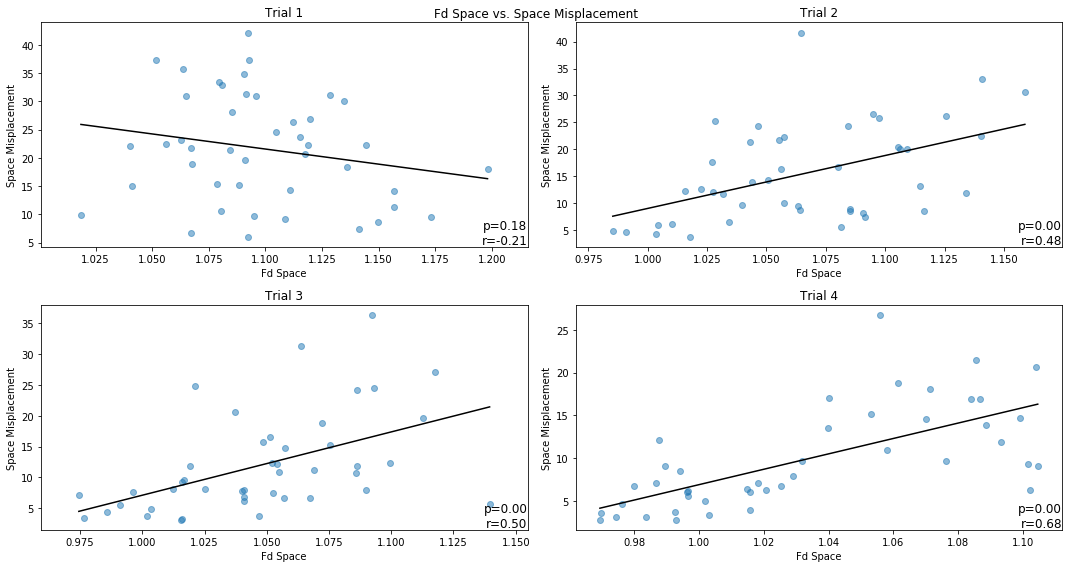

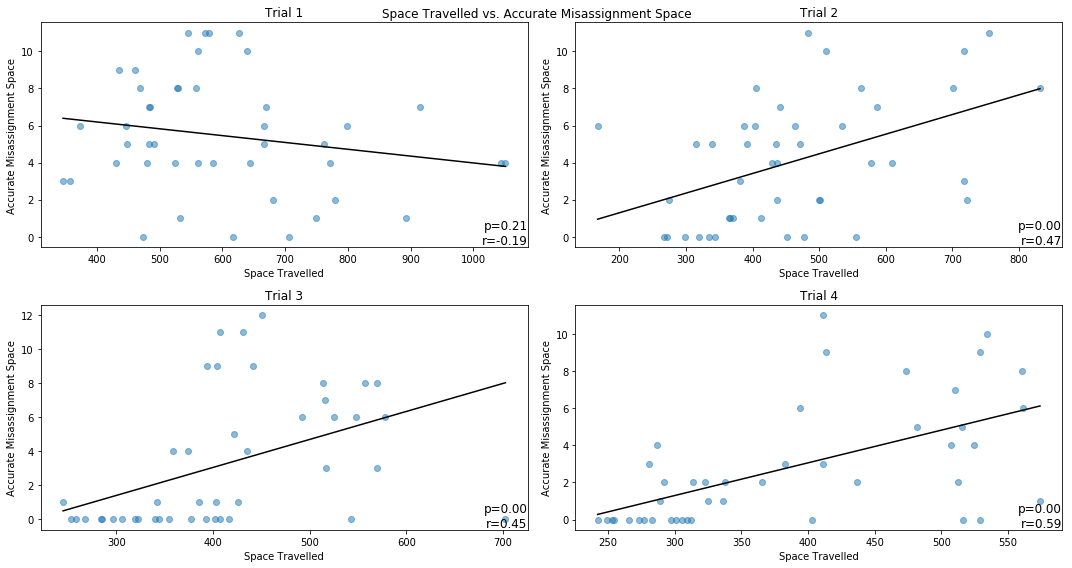

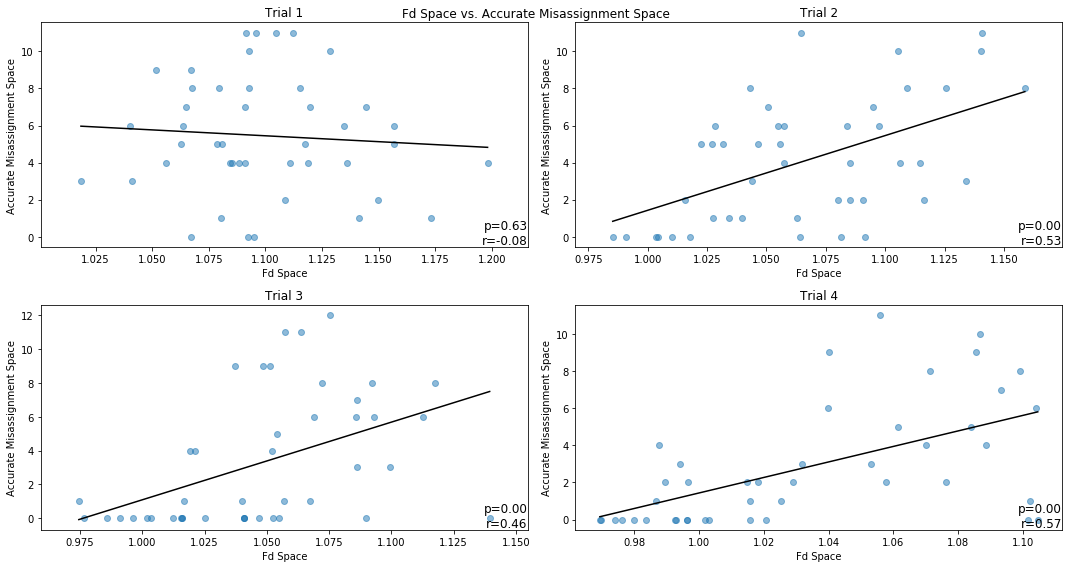

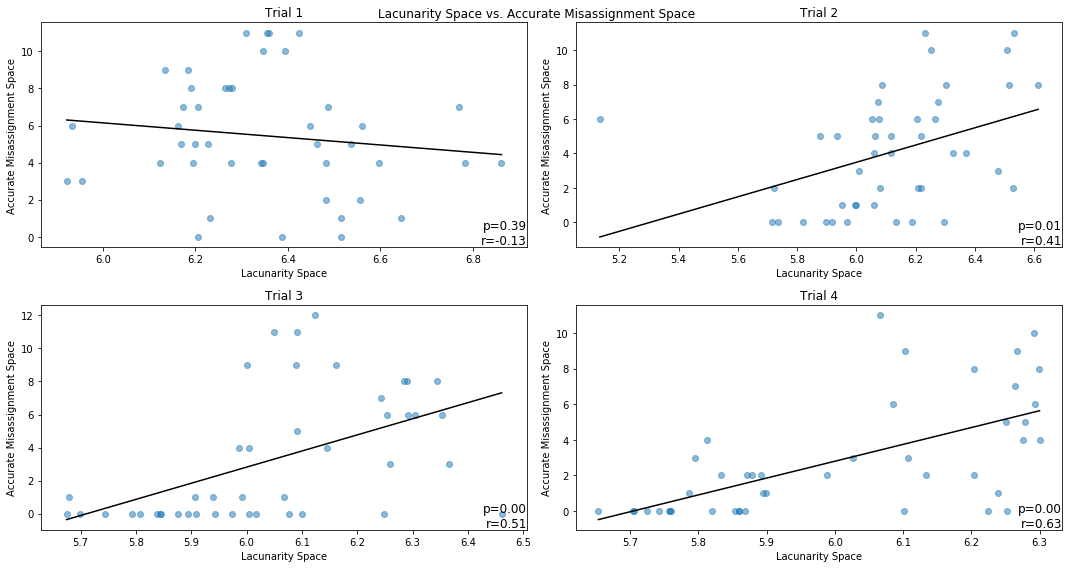

In [32]:
for relation in relations:
    display_obj = get_animation(relation, animate=False)
    if 'generate_embedded_animations' in vars() and generate_embedded_animations and 'embed_animation_as_gif' in vars():
        display_obj = embed_animation_as_gif(display_obj)
    display.display_html(display_obj)

### Plotting the Residuals of the Fit

Next, we can plot the same effect in terms of the residuals after accounting for the random effects.

In [33]:
import matplotlib.pyplot as plt

relations = [
    ['space_misplacement', 'space_travelled'],
    ['space_misplacement', 'fd_space'],
    ['accurate_misassignment_space', 'space_travelled'],
    ['accurate_misassignment_space', 'fd_space'],
    ['accurate_misassignment_space', 'lacunarity_space']
]

relation_models = [models[x] for x in [0, 0, 1, 1, 1]]

def plot_residuals(r0, r1, model, title=''):
    # Make new figure
    plt.figure()
    # Get the subject coefficients
    subject_lines = pandas2ri.ri2py(r.summary(model).rx2('coefficients').rx2('random').rx2('subID'))
    x = np.array([0, 1, 2, 3])
    ys = [x*slope + intercept for intercept, slope in subject_lines]
    
    # Get the relation data
    r0_data = [data[r0][data['trial'] == n] for n in list(x)]
    r1_data = [data[r1][data['trial'] == n] for n in list(x)]
    
    # Compute the residuals of the target variable
    r0_resid = np.transpose(np.array(ys)) - np.array(r0_data)
    
    return get_animation_from_data(r0_resid, r1_data, title=title)

In [ ]:
for relation in relations:
    r0, r1 = relation
    if 'generate_embedded_animations' in vars() and generate_embedded_animations and 'embed_animation_as_gif' in vars():
        display_obj = embed_animation_as_gif(display_obj)
    else:
        display_obj = plot_residuals(r0, r1, relation_models[0], title=r0 + ' vs. ' + r1)
    display.display_html(display_obj)

## Visualization

Next, we'll do some basic visualization of Navigation.

In [35]:
from cogrecon.core.data_flexing.time_travel_task.time_travel_task_binary_reader import read_binary_file
import os
import numpy as np
from math import atan2,degrees

def GetAngleOfLineBetweenTwoPoints(p1, p2):
    xDiff = p2['x'] - p1['x']
    yDiff = p2['y'] - p1['y']
    return degrees(atan2(yDiff, xDiff))

In [36]:
data = pd.read_csv(os.path.join('.', output_directory, 'study_path.csv'))
grp = data.groupby(['subject_id', 'trial_number'])

In [37]:
target = (1, 0)
for name, group in grp:
    if name == target:
        x, y = np.transpose(np.array(group[['x', 'z']]))
        break

C:\Program Files\Anaconda3\envs\iposition\lib\site-packages\matplotlib\patches.py:91: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


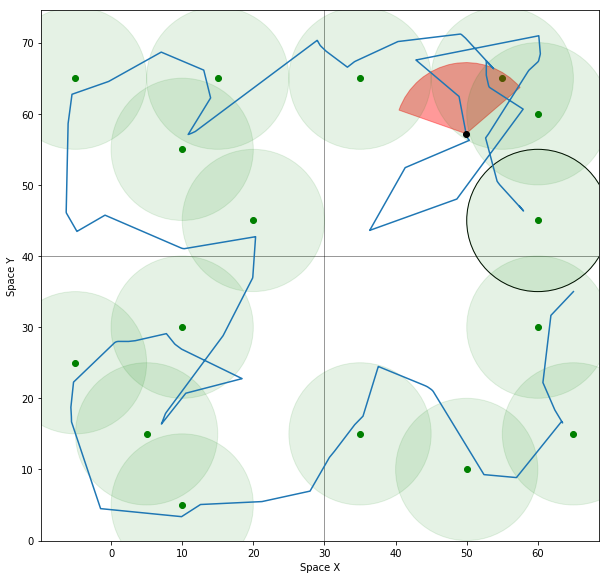

In [38]:
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Rectangle, Circle

fov = 60.0
idx = int(len(x)/1.2)
window = 2.
study_realX = [5, 10, 10, 50, 10, 65, 35, 15, 35, 55, -5, -5, 20, 60, 60, 60]
study_realY = [15, 5, 30, 10, 55, 15, 15, 65, 65, 65, 25, 65, 45, 60, 30, 45]
space_points = list(zip(study_realX, study_realY))
e = 'k'

plt.figure(figsize=(10, 10))
plt.xlabel('Space X')
plt.ylabel('Space Y')
angle = GetAngleOfLineBetweenTwoPoints({'x':x[idx], 'y': y[idx]}, {'x': x[idx+10], 'y': y[idx+10]})
plt.gca().add_artist(Rectangle((-10,0),80,80, color='k', alpha=0.4, fill=False))
plt.gca().add_artist(Rectangle((-10,0),40,80, color='k', alpha=0.4, fill=False))
plt.gca().add_artist(Rectangle((-10,0),80,40, color='k', alpha=0.4, fill=False))
plt.gca().add_artist(Wedge((x[idx], y[idx]), 10, angle-fov, angle+fov, color='r', alpha=0.4))
plt.gca().set_aspect('equal')
for i, sp in enumerate(space_points):
    if i == len(space_points) - 1:
        plt.gca().add_artist(Circle((sp[0], sp[1]), 10, fill=False, alpha=1, edgecolor='k'))
    plt.gca().add_artist(Circle((sp[0], sp[1]), 10, color='g', alpha=0.1, edgecolor=e))
plt.scatter(np.transpose(space_points)[0], np.transpose(space_points)[1], c='g')
plt.scatter([x[idx]], [y[idx]], c='k', alpha=1, zorder=10)
plt.plot(x, y)

plt.show()